In [14]:
import pandas as pd
import numpy as np 
import os

## load data

In [15]:
# Currently use sys to get other script
import sys
sys.path.insert(1, "../Classes/")
from gene_one_hot import one_hot
def maf_data(data, Path):
    '''

    '''
    if Path != False:
        if not Path.endswith(".pkl"):
            Path = Path + "maf_extract_summary.pkl"
        
        data = pd.read_pickle(Path)

    return data

maf_data = maf_data(data=False, Path="../Data/Ongoing/")

In [3]:
# Currently use sys to get other script
import sys
sys.path.insert(1, "../Classes/")
from media_class import Medium, Supplement, GrowthMedium, Medium_one_hot, Supplement_one_hot, GrowthMedium_one_hot

def other_data(data, Path):
    '''

    '''
    if Path != False:
        if not Path.endswith(".pkl"):
            Path = Path + "after_media.pkl"
        
        data = pd.read_pickle(Path)

    return data 

meta_data = other_data(data=False, Path="../Data/Ongoing/after_media.pkl")

## Check maf_data -> add in maf_info.py

In [4]:
len(maf_data["Flat_one_hot"].iloc[0].counts)

546

In [5]:
len(maf_data["Alt_one_hot"].iloc[0].counts)

6552

## Combine datasets

In [6]:
# Create File name -> Should be in maf.py
meta_data["File"] = [str(x).split("/")[-1] for x in meta_data["PANEL_oncotated_maf_mutect2"]]

In [7]:
meta_data

,Cell_Line_Starting_Sample,PT-ID,SM-ID,Status,Resolution_Original,Type,Primary_Disease,Tissue_Site,Tumor_Type,Cell_Line,...,RNA_star_md_bam_index,RNA_star_read_counts,RNA_star_transcriptome_bam,WES_formatted_bai_file,WES_formatted_bam_file,WES_cnv_calls,RNA_match,media_class,one-hot,File
entity:sample_id,,,,,,,,,,,,,,,,,,,,,
DW036T_0,DW036T,NaN,SM-CNRSK,Closed,Completed,Tumor,NaN,NaN,NaN,DW036T,...,NaN,gs://fc-b3a85406-97fd-452d-bbff-a44c92749ada/b...,gs://fc-b3a85406-97fd-452d-bbff-a44c92749ada/b...,NaN,NaN,NaN,Unsure,"GrowthMedium(media={'AR5': Medium(name='AR5', ...",GrowthMedium_one_hot(media=Medium_one_hot(coun...,DW036-Tumor-SM-DB2K4.mutect2.maf.annotated
DW036T_1,DW036T,PT-21FSL,NaN,Closed,Completed,Tumor,t-pll,NaN,NaN,DW036T,...,NaN,gs://fc-b3a85406-97fd-452d-bbff-a44c92749ada/b...,gs://fc-b3a85406-97fd-452d-bbff-a44c92749ada/b...,NaN,NaN,NaN,Unsure,"GrowthMedium(media={'AR5': Medium(name='AR5', ...",GrowthMedium_one_hot(media=Medium_one_hot(coun...,DW036-Tumor-SM-DB2K4.mutect2.maf.annotated
DW036T_2,DW036T,NaN,SM-CNRSM,Closed,Terminated,Tumor,NaN,NaN,NaN,DW036T,...,NaN,gs://fc-b3a85406-97fd-452d-bbff-a44c92749ada/b...,gs://fc-b3a85406-97fd-452d-bbff-a44c92749ada/b...,NaN,NaN,NaN,Unsure,GrowthMedium(media={'Xvivo-15': Medium(name='X...,GrowthMedium_one_hot(media=Medium_one_hot(coun...,DW036-Tumor-SM-DB2K4.mutect2.maf.annotated
DW036T_3,DW036T,NaN,SM-CNRSJ,Closed,Terminated,Tumor,NaN,NaN,NaN,DW036T,...,NaN,gs://fc-b3a85406-97fd-452d-bbff-a44c92749ada/b...,gs://fc-b3a85406-97fd-452d-bbff-a44c92749ada/b...,NaN,NaN,NaN,Unsure,"GrowthMedium(media={'AR5': Medium(name='AR5', ...",GrowthMedium_one_hot(media=Medium_one_hot(coun...,DW036-Tumor-SM-DB2K4.mutect2.maf.annotated
DW036T_4,DW036T,PT-21FSL,SM-CNRSL,Closed,Verified Tumor,Tumor,t-pll,Blood,Primary,DW036T,...,NaN,gs://fc-b3a85406-97fd-452d-bbff-a44c92749ada/b...,gs://fc-b3a85406-97fd-452d-bbff-a44c92749ada/b...,NaN,NaN,NaN,Unsure,GrowthMedium(media={'Xvivo-15': Medium(name='X...,GrowthMedium_one_hot(media=Medium_one_hot(coun...,DW036-Tumor-SM-DB2K4.mutect2.maf.annotated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SM-J8A8G_12,SM-J8A8G,PT-2NPEJ,SM-JKWXJ,Closed,Verified Tumor,Tumor,medulloblastoma,Brain,Primary,CCLF_KL1338T,...,NaN,NaN,NaN,NaN,NaN,NaN,Unsure,GrowthMedium(media={'OPAC': Medium(name='OPAC'...,GrowthMedium_one_hot(media=Medium_one_hot(coun...,SM-JL77Q.mutect2.maf.annotated
SM-J8A8G_13,SM-J8A8G,PT-2NPEJ,SM-JKWXK,Closed,Verified Tumor,Tumor,medulloblastoma,Brain,Primary,CCLF_KL1338T,...,NaN,NaN,NaN,NaN,NaN,NaN,Unsure,GrowthMedium(media={'OPAC': Medium(name='OPAC'...,GrowthMedium_one_hot(media=Medium_one_hot(coun...,SM-JL77Q.mutect2.maf.annotated
SM-J8A8G_14,SM-J8A8G,PT-2NPEJ,SM-JKWXL,Closed,Verified Tumor,Tumor,medulloblastoma,Brain,Primary,CCLF_KL1338T,...,NaN,NaN,NaN,NaN,NaN,NaN,Unsure,GrowthMedium(media={'OPAC': Medium(name='OPAC'...,GrowthMedium_one_hot(media=Medium_one_hot(coun...,SM-JL77Q.mutect2.maf.annotated


In [8]:
data = pd.merge(meta_data, maf_data, on="File")

In [9]:
# Input with media as input
input_data = data.apply(lambda x: np.append(x["Flat_one_hot"].counts, x["one-hot"].media.counts), axis=1)
input_data = np.vstack(input_data)

#Specify Ouput 
output_data = np.vstack(data["Growth"])
output_data = np.ravel(output_data)

In [10]:
# Input with media+supplements as input
input_data_supplements = data.apply(lambda x: np.append(x["Flat_one_hot"].counts, np.append(x["one-hot"].media.counts, x["one-hot"].supplements.counts)), axis=1)
input_data_supplements = np.vstack(input_data_supplements)

#Specify Ouput 
output_data_supplements = np.vstack(data["Growth"])
output_data_supplements = np.ravel(output_data_supplements)

In [11]:
# With media as output next to growing
#Specify input
input_data_neural = np.vstack([x.counts for x in data["Flat_one_hot"]])

#Specify Ouput 
# Add array which has one-hot media+supplements with growing not growing
output_data_neural = data.apply(lambda x: np.append(np.append(x["one-hot"].media.counts, x["one-hot"].supplements.counts), x["Growth"]), axis=1)
output_data_neural = np.vstack(output_data_neural)

In [12]:
data_terra = {"input_data": input_data.tolist(), 
              "output_data": output_data.tolist(), 
              "input_data_supplements":input_data_supplements.tolist(), 
              "output_data_supplements": output_data_supplements.tolist(), 
              "input_data_neural": input_data_neural.tolist(), 
              "output_data_neural":output_data_neural.tolist()
             }

In [13]:
import json
with open('../Data/Ongoing/result.json', 'w') as fp:
    json.dump(data_terra, fp)

# Label Encoder

In [ ]:
#Create one-hot encoding for genes

In [ ]:
def data_maf(data, Path):
    '''

    '''
    if Path != False:
        if not Path.endswith(".pkl"):
            Path = Path + "maf_extract.pkl"
        
        data = pd.read_pickle(Path)

    return data

data_maf = data_maf(data=False, Path="../Data/Ongoing/")

In [ ]:
data_maf

# Genes vs n_samples

In [ ]:
total_array = sum([x.counts for x in maf_data["Flat_one_hot"]])
n_samples = {}
from math import log2
for n in range(10, len(maf_data["Flat_one_hot"].iloc[0].counts), 10):
    tmp_data = maf_data
    # Drop all which are not n highest
    index_drop = np.argsort(total_array)[:n]

    # Should work with drop function in class but this is also nice for now
    index = [index for index, x in enumerate(tmp_data["Flat_one_hot"]) if sum(np.delete(x.counts, index_drop)) > 1]
    n_samples[n] = log2(len(index))

In [ ]:
import matplotlib.pylab as plt

lists = sorted(n_samples.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(y, x)
plt.show()

In [ ]:
total_array[np.argsort(-total_array)[:10]]

In [ ]:
y = sorted(total_array/len(maf_data))*100, reverse=True)

In [ ]:
plt.plot(list(range(0, len(total_array))), y)

In [ ]:
len([x for x in y if x > 3])

In [ ]:
len([x for x in y if x <= 3])

In [ ]:
0.03*547

In [ ]:
data_maf["Ensembl_so_term"].unique()

In [ ]:
data_maf[data_maf["Ensembl_so_term"] == '']

In [ ]:
data_maf["Variant_Classification"].unique()

In [ ]:
data_maf = data_maf[~data_maf["Variant_Classification"].isin(["Intron", "lincRNA", "IGR", "5'Flank", "5'UTR", "Silent", "3'UTR", "RNA"])]

In [ ]:
len(test["Hugo_Symbol"].unique())

In [ ]:
maf_data

In [ ]:
maf_data

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl


In [69]:
highest_scores = np.array([ 65,  32,  11,  18,   1,  54,  45, 122, 119, 196,  94,  42,  50,
        26,  13,  40,  57,  22,  12,  69,  39, 193,  67,  15,  68, 173,
       475, 103,  34,  10, 121, 137,  74,   0,  28,  24,  19,  60, 175,
        79, 341,  56,  21,  66, 132,  71,  49,  70,  31,  20])

In [105]:
genes1 = maf_data.iloc[0]["Flat_one_hot"].levels[highest_scores]

In [106]:
f_score =np.array([0.01666961, 0.01132254, 0.0099653 , 0.00991753, 0.00972287,
       0.00969755, 0.00928758, 0.00885865, 0.0081736 , 0.00810445,
       0.00782665, 0.00780647, 0.00745482, 0.00744726, 0.00738917,
       0.00732615, 0.00731124, 0.00727611, 0.00724983, 0.007246  ,
       0.00721687, 0.0070789 , 0.00703388, 0.00696101, 0.00687487,
       0.00675286, 0.00674249, 0.00673017, 0.00671632, 0.00663203,
       0.00651537, 0.00635222, 0.00633557, 0.00625092, 0.00610628,
       0.00603388, 0.00601596, 0.00593654, 0.0059038 , 0.00586776,
       0.00586601, 0.005836  , 0.00581197, 0.00572172, 0.00561348,
       0.00554247, 0.00538834, 0.00536273, 0.00533978, 0.00519852])

[Text(0, 0, 'SMARCA4'),
 Text(0, 0, 'PTCH1'),
 Text(0, 0, 'PIK3CA'),
 Text(0, 0, 'APC'),
 Text(0, 0, 'NOTCH2'),
 Text(0, 0, 'TP53'),
 Text(0, 0, 'BRCA2'),
 Text(0, 0, 'BRAF'),
 Text(0, 0, 'GNAS'),
 Text(0, 0, 'DSP'),
 Text(0, 0, 'KIAA1211'),
 Text(0, 0, 'KMT2D'),
 Text(0, 0, 'TSC2'),
 Text(0, 0, 'MET'),
 Text(0, 0, 'TET2'),
 Text(0, 0, 'CDKN1B'),
 Text(0, 0, 'ERBB2'),
 Text(0, 0, 'NSD1'),
 Text(0, 0, 'FGFR3'),
 Text(0, 0, 'PLCG1'),
 Text(0, 0, 'KMT2A'),
 Text(0, 0, 'GABRA4'),
 Text(0, 0, 'AKT2'),
 Text(0, 0, 'MAP3K1'),
 Text(0, 0, 'ERCC2'),
 Text(0, 0, 'CCND2'),
 Text(0, 0, 'DZANK1'),
 Text(0, 0, 'PDGFRA'),
 Text(0, 0, 'NOTCH1'),
 Text(0, 0, 'ATR'),
 Text(0, 0, 'ERBB4'),
 Text(0, 0, 'RB1'),
 Text(0, 0, 'EWSR1'),
 Text(0, 0, 'MTOR'),
 Text(0, 0, 'FGFR1'),
 Text(0, 0, 'ESR1'),
 Text(0, 0, 'PCDHAC2'),
 Text(0, 0, 'BRCA1'),
 Text(0, 0, 'MYC'),
 Text(0, 0, 'AR'),
 Text(0, 0, 'SYT6'),
 Text(0, 0, 'NF1'),
 Text(0, 0, 'PDGFRB'),
 Text(0, 0, 'BRD4'),
 Text(0, 0, 'DNMT3A'),
 Text(0, 0, 'ERG'),
 

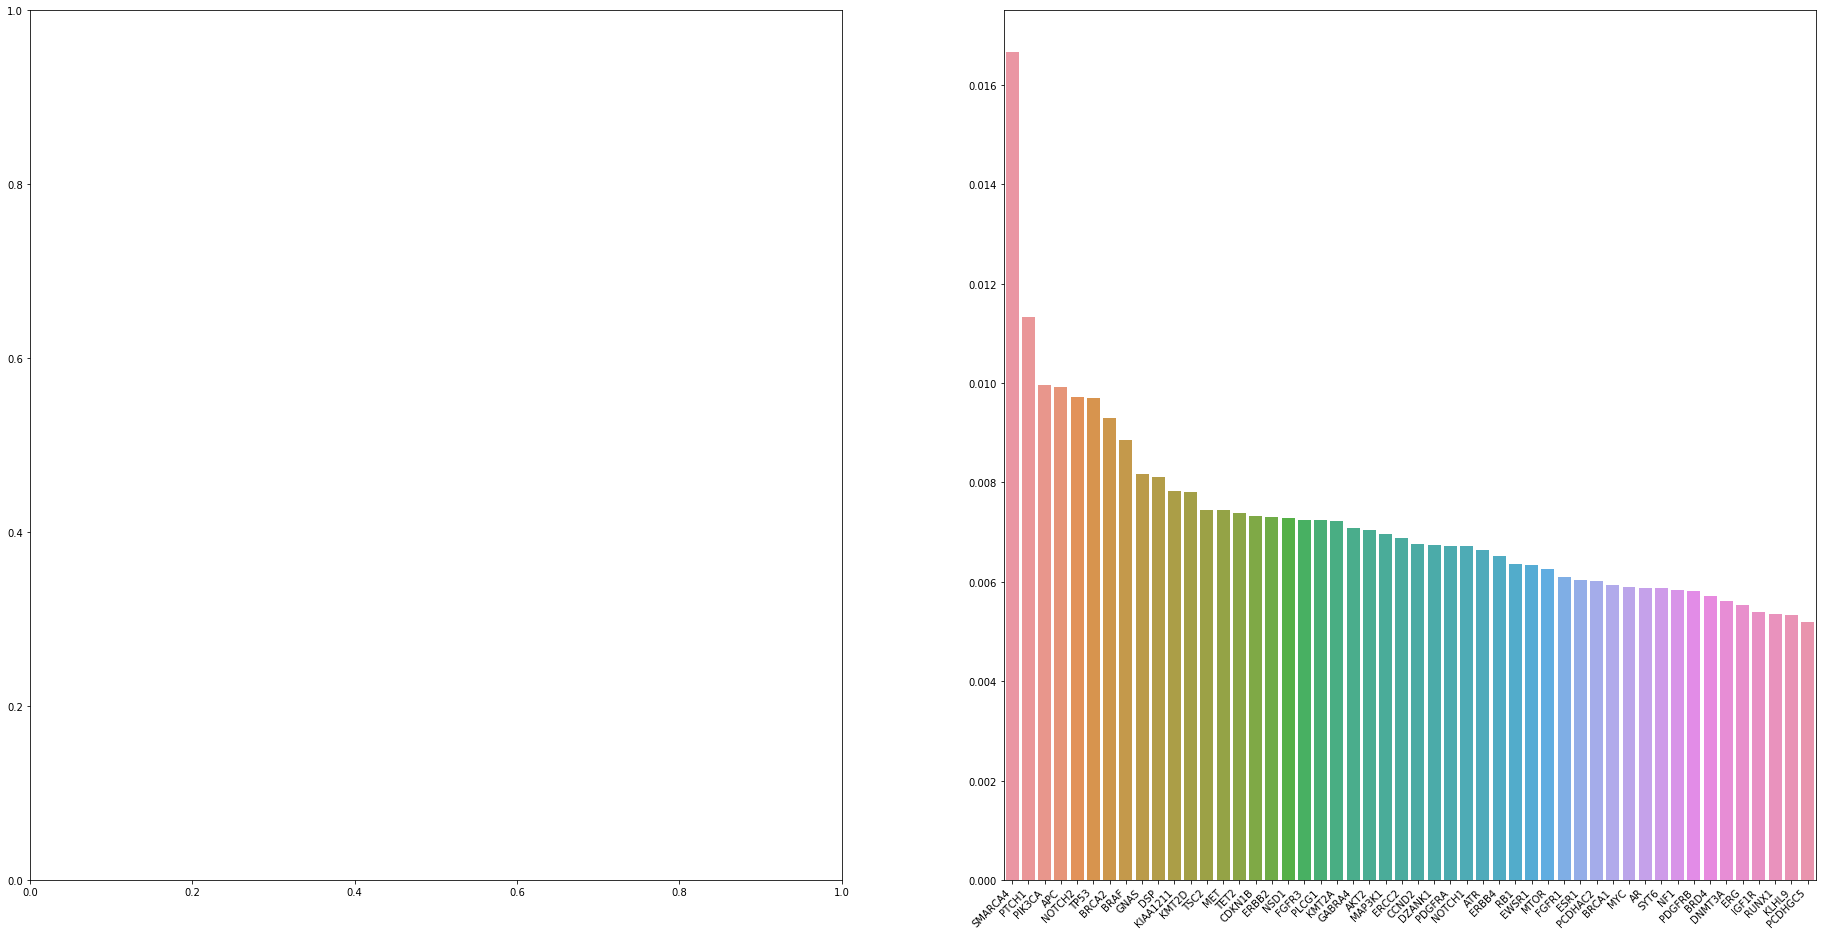

In [104]:
f, ax = plt.subplots(1, 2, figsize=(32, 16))
ax1 = ax[0]
ax2 = ax[1]
ax1 = sns.barplot(x=genes1, y=f_score)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')


In [113]:
combined_genes = sum([x.counts[highest_scores] for x in maf_data["Flat_one_hot"]])

In [117]:
genes2 = highest_scores[np.argsort(combined_genes)]

In [118]:
genes =  maf_data.iloc[0]["Flat_one_hot"].levels[genes2]

In [75]:
gene_scores = np.array([x.counts[genes].tolist() for x in maf_data["Flat_one_hot"]])

In [76]:
gene_scores

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

[Text(0, 0.5, 'Feature importance score')]

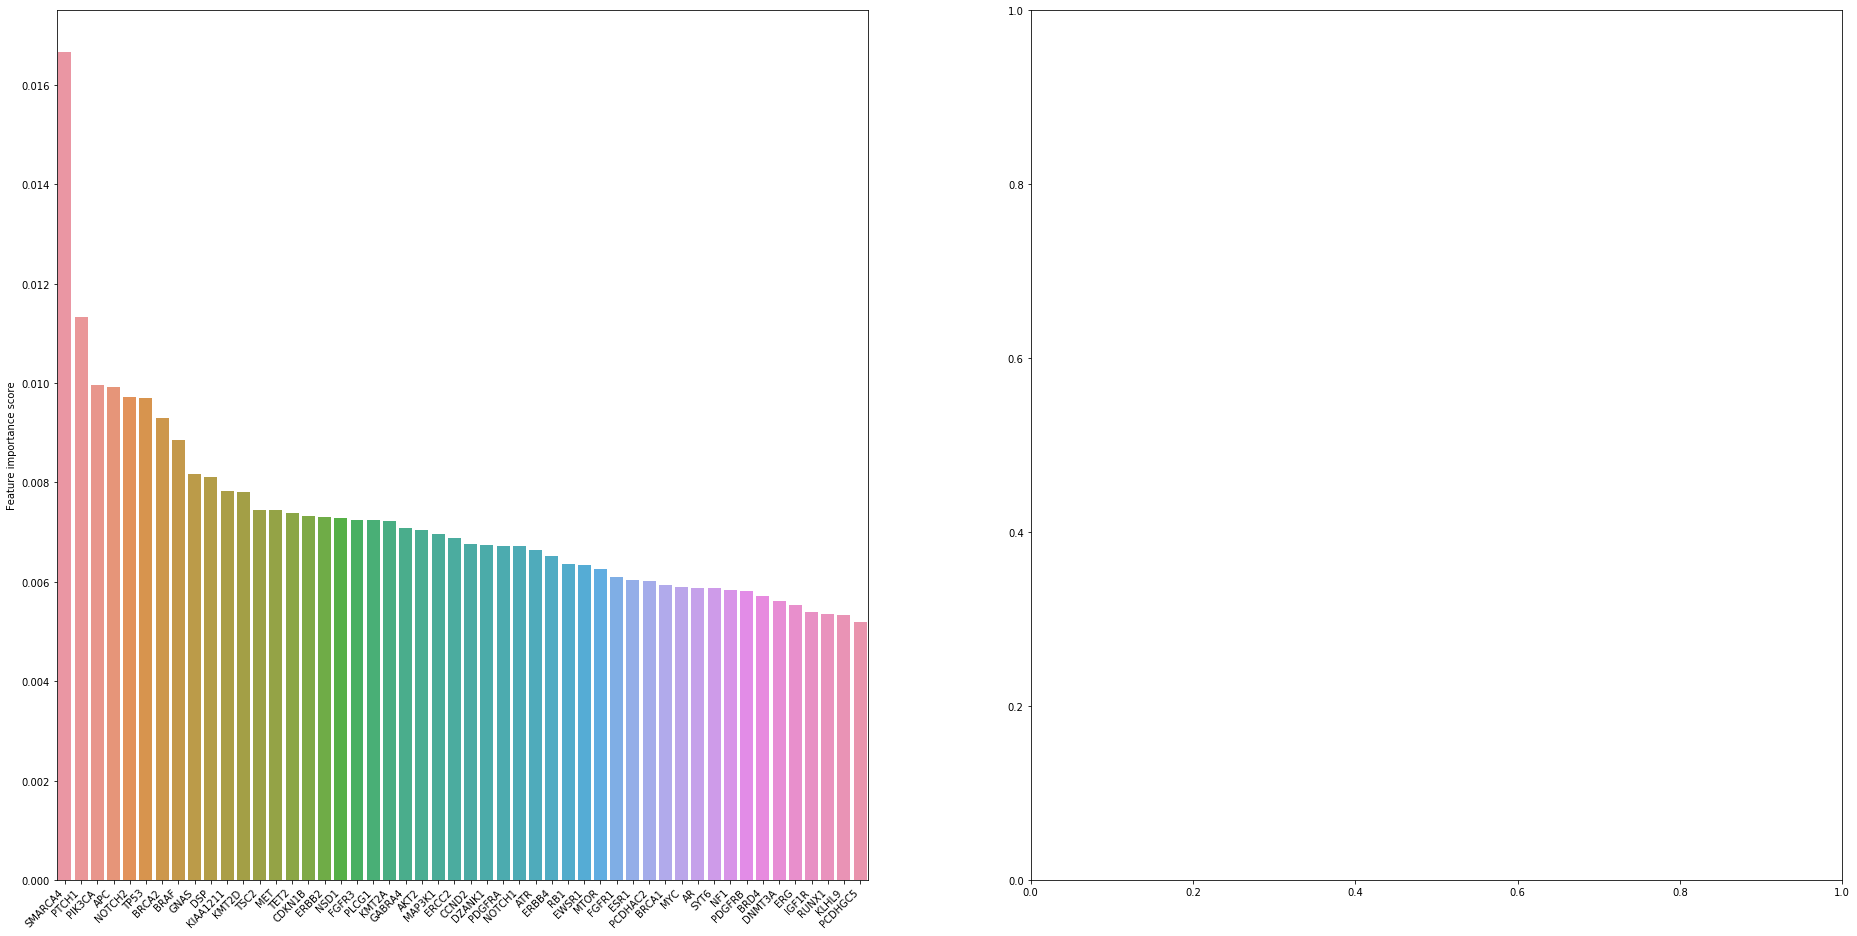

In [124]:
f, ax = plt.subplots(1, 2, figsize=(32, 16))
ax1 = sns.barplot(x=genes1, y=f_score, ax=ax[0])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set(ylabel='Feature importance score')